# Exercise 2.2

First of all, we import usefull libraries.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Now, we import our normalized sotored data.

In [2]:
%store -r data_set

We define some variables like the assignation matrix, feature space, number of clusters and minimal points (that's not the noise).

In [3]:
assignation = np.zeros(len(data_set))
distance_matrix = np.zeros((len(data_set), len(data_set)))
max_distance = 0.25
number_of_cluster = 0
min_points = 2

Now, as in previous exercise, we define a function to calculate distante between two vectors, and we use it to define another function which calculates distance of a given matrix.

We also get closest elements in the feature space by defining function $get\_closest\_elements$.

We're defining two functions in order to mark that points that were already set as noise or visited.

Finally, we combine all of this with $cluster\_density$ function.

In [4]:
def calculate_distance(x, v):
    return np.linalg.norm(x - v)


def calculate_distance_matrix():
    n = len(data_set)
    distance_matrix = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = calculate_distance(data_set[i], data_set[j])
    return distance_matrix


def get_closest_elements(distance_matrix, element_id):
    element_distances = distance_matrix[element_id]
    filtered = {}
    iteration = 0
    
    for element in element_distances:
        if element < max_distance:
            filtered[iteration] = element
        
        iteration += 1
    return filtered


def set_as_noise(assignation,element_id):
    assignation[element_id] = -1
    return assignation


def set_visited(elements, assignation, number_of_clusters):    
    for element_id in elements.keys():
        assignation[element_id] = number_of_clusters 
    return assignation


def cluster_density(assignation):
    number_of_cluster = 0
    distance_matrix = calculate_distance_matrix() # We calculate all combinations of distances in data_set
    element_ids = list(range(len(data_set)))
    random.shuffle(element_ids)
    
    for i in element_ids:
        if assignation[i] != 0:
            continue
        
        closest = get_closest_elements(distance_matrix, i)
        if len(closest) < min_points:
            assignation = set_as_noise(assignation, i)
        
        else:
            assignation = set_visited(closest, assignation, number_of_cluster)
            number_of_cluster = number_of_cluster + 1
    return assignation

Now, we cluster and count number of clusters.

In [5]:
assigned_groups = cluster_density(assignation)

print('Number of clusters:', len(np.unique(assigned_groups)) - 1) # We're subtracting noise group

Number of clusters: 2


In [6]:
print(assigned_groups)

[ 2.  2.  2.  2.  2.  2.  1.  1. -1. -1.]


We now define a function which return the objects of a given group.

In [7]:
def get_group_objects(color_id):
    return data_set[np.where(assigned_groups == color_id)]

Finally, we plot our results, where we're graphing points from a same group in same color (noise is poltted in red, in case there is).

We're also plotting circles around points, so we can see they begin to the same group unless noise (it doesn't begin to any group).

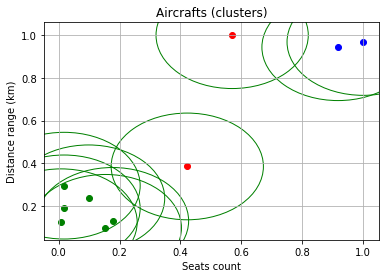

In [8]:
colors = ['red','blue','green','orange','black','yellow']

fig, ax = plt.subplots()

for group in np.unique(assigned_groups):
    small_set = get_group_objects(group) 
    ax.scatter(small_set[:,0], small_set[:,1], c = colors.pop(0))
    
    for circle in small_set:
        circle1 = plt.Circle((circle[0], circle[1]), 0.25, color = 'green', fill = False)        
        ax.add_artist(circle1)
    
ax.set(xlabel = u'Seats count', ylabel =u'Distance range (km)', title = u'Aircrafts (clusters)')
ax.grid()
plt.show()